In [1]:
import sys
sys.path.append("..")

from data.data_loader import normalised_subspace, subspace, scaler
from synthetic_anomalies.generation import anomaly_dataset
import seaborn as sns

from sklearn.metrics import roc_auc_score, log_loss
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from sklearn.manifold import TSNE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

from benchmark import anom_types, models, model_outputs, init_algos
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import scienceplots
plt.style.use('science')

In [8]:
output = anomaly_dataset(
    anom_size=1000
)

In [3]:
# Anomaly data set visualised using tSNE
from sklearn.decomposition import PCA

#tsne = TSNE()
pca = PCA(n_components=2).fit_transform(output.to_numpy()[:, 0:5])

X_embed = pca#tsne.fit_transform(output.to_numpy()[:, 0:5])

output["pca_1"] = X_embed[:, 0]
output["pca_2"] = X_embed[:, 1]

'''fig, ax = plt.subplots(figsize=(10,10))

g = sns.scatterplot(
    data = output,
    x="t-SNE X",
    y="t-SNE Y",
    hue="label",
    palette="Spectral",
    s=1,
    ax=ax,
    size="label",
    sizes=(.1,10)
)
plt.setp(g.get_legend().get_texts(), fontsize='14')'''

'fig, ax = plt.subplots(figsize=(10,10))\n\ng = sns.scatterplot(\n    data = output,\n    x="t-SNE X",\n    y="t-SNE Y",\n    hue="label",\n    palette="Spectral",\n    s=1,\n    ax=ax,\n    size="label",\n    sizes=(.1,10)\n)\nplt.setp(g.get_legend().get_texts(), fontsize=\'14\')'

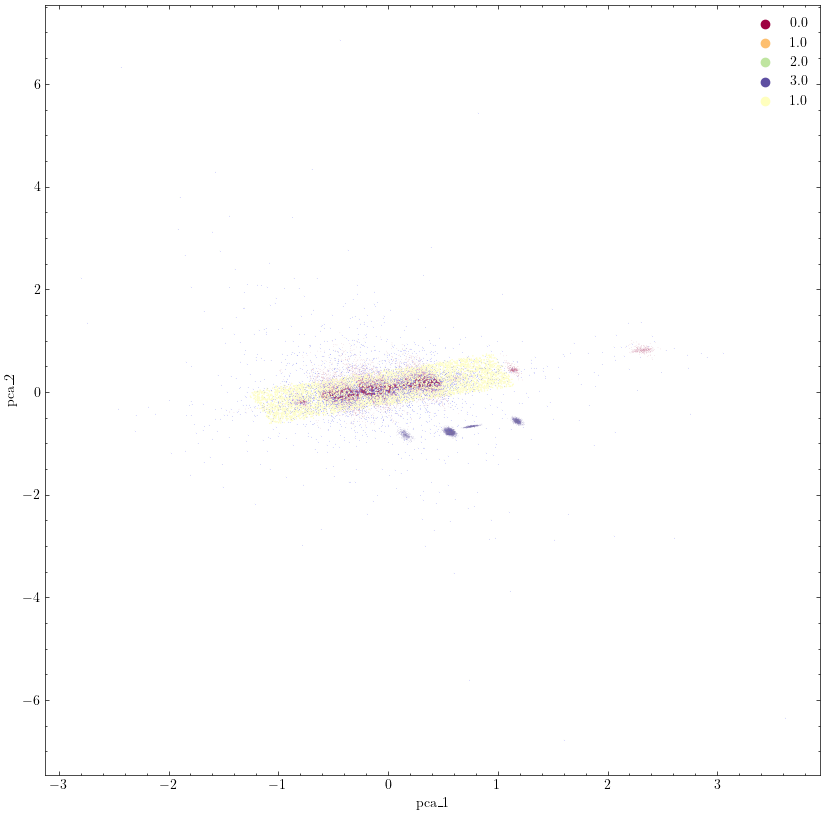

In [21]:
fig, ax = plt.subplots(figsize=(10,10))

g = sns.scatterplot(
    data = output,
    x="pca_1",
    y="pca_2",
    hue="label",
    palette="Spectral",
    s=.1,
    alpha=.5,
    ax=ax,
    #size="label",
    #sizes=(5,10)
)

plt.setp(g.get_legend().get_texts(), fontsize='14')

g = sns.scatterplot(
    data = output[output["label"] == 1],
    x="pca_1",
    y="pca_2",
    hue="label",
    palette="Spectral",
    s=1,
    alpha=1,
    ax=ax,
    #size="label",
    #sizes=(5,10)
)
g = sns.scatterplot(
    data = output[output["label"] == 2],
    x="pca_1",
    y="pca_2",
    #hue="label",
    c="blue",
    s=.1,
    alpha=1,
    ax=ax,
    #size="label",
    #sizes=(5,10)
)

[None, None, None, None, None, None, None, None]

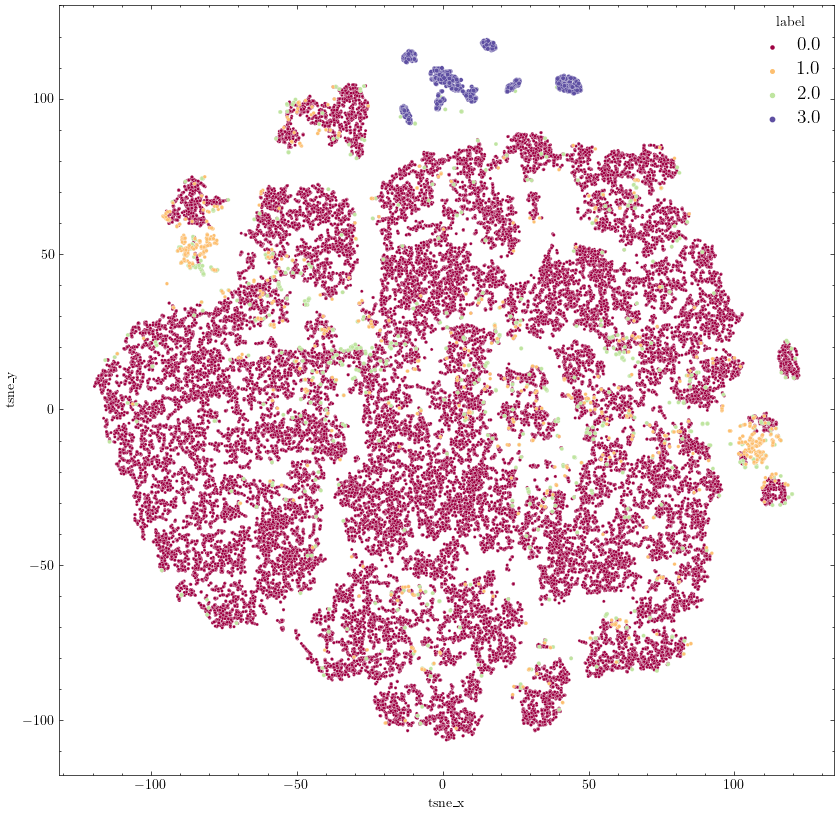

In [19]:
tsne = TSNE()
X_embed = tsne.fit_transform(output.to_numpy()[:, 0:5])

output["tsne_x"] = X_embed[:, 0]
output["tsne_y"] = X_embed[:, 1]


fig, ax = plt.subplots(figsize=(10,10))

g = sns.scatterplot(
    data = output,
    x="tsne_x",
    y="tsne_y",
    hue="label",
    palette="Spectral",
    s=1,
    ax=ax,
    size="label",
    sizes=(5,10)
)
plt.setp(g.get_legend().get_texts(), fontsize='14')

/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_7268/1333273122.py:116: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [30]
/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_7268/1333273122.py:117: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [30]
/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_7268/1333273122.py:118: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[2]._sizes = [30]
/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_7268/1333273122.py:119: MatplotlibDeprecationWarning: The legendHandles attri

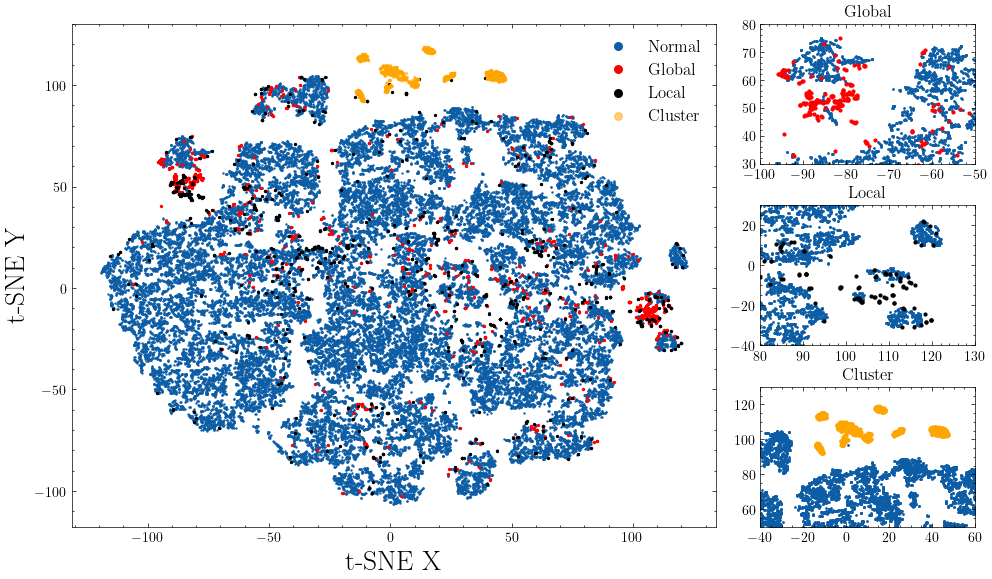

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Create a large figure
fig = plt.figure(figsize=(10, 6))

# Create a grid for the main plot and the panel
main_grid = fig.add_gridspec(1, 2, width_ratios=[3, 1])

# Main plot
main_plot = fig.add_subplot(main_grid[0, 0])

main_plot.scatter(
    output[output["label"] == 0]["tsne_x"],
    output[output["label"] == 0]["tsne_y"],
    s=.5,
    marker="o",
    label="Normal"
)
main_plot.scatter(
    output[output["label"] == 1]["tsne_x"],
    output[output["label"] == 1]["tsne_y"],
    s=2,
    marker="o",
    c="r",
    label="Global"
)
main_plot.scatter(
    output[output["label"] == 2]["tsne_x"],
    output[output["label"] == 2]["tsne_y"],
    s=2,
    marker="o",
    c="black",
    label="Local"
)
main_plot.scatter(
    output[output["label"] == 3]["tsne_x"],
    output[output["label"] == 3]["tsne_y"],
    s=2,
    marker="o",
    c="orange",
    alpha=.5,
    label="Cluster"
)

main_plot.set_xlabel("t-SNE X", fontsize=20)
main_plot.set_ylabel("t-SNE Y", fontsize=20)

# Panel with subplots
panel_grid = main_grid[0, 1].subgridspec(3, 1, hspace=0.3)

# Create three smaller subplots in the panel
#for i in range(3):
ax = fig.add_subplot(panel_grid[0, 0])
ax.scatter(
    output[(output["label"] == 0)]["tsne_x"],
    output[output["label"] == 0]["tsne_y"],
    s=1,
    marker="o",
)
ax.scatter(
    output[(output["label"] == 1)]["tsne_x"],
    output[output["label"] == 1]["tsne_y"],
    s=4,
    marker="o",
    c="r"
)
'''ax.set_xlim(10,40)
ax.set_ylim(-30,10)'''
'''ax.set_xlim(40,60)
ax.set_ylim(-20,-40)'''
ax.set_xlim(-100,-50)
ax.set_ylim(30,80)
ax.set_title(f"Global")

ax = fig.add_subplot(panel_grid[1, 0])

ax.scatter(
    output[(output["label"] == 0)]["tsne_x"],
    output[output["label"] == 0]["tsne_y"],
    s=1,
    marker="o",
)
ax.scatter(
    output[(output["label"] == 2)]["tsne_x"],
    output[output["label"] == 2]["tsne_y"],
    s=4,
    marker="o",
    c="black"
)
ax.set_xlim(80,130)
ax.set_ylim(-40,30)
ax.set_title(f"Local")

ax = fig.add_subplot(panel_grid[2, 0])
ax.scatter(
    output[(output["label"] == 0)]["tsne_x"],
    output[output["label"] == 0]["tsne_y"],
    s=1,
    marker="o",
)
ax.scatter(
    output[(output["label"] == 3)]["tsne_x"],
    output[output["label"] == 3]["tsne_y"],
    s=4,
    marker="o",
    c="orange",
)
ax.set_ylim(50, 130)
ax.set_xlim(-40,60)
ax.set_title(f"Cluster")

# Adjust layout
plt.tight_layout()
legend = main_plot.legend(loc="upper right", fontsize=12, scatterpoints=1)
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
legend.legendHandles[3]._sizes = [30]

plt.savefig("anom_types.png", dpi=500)
# Show the plot
plt.show()

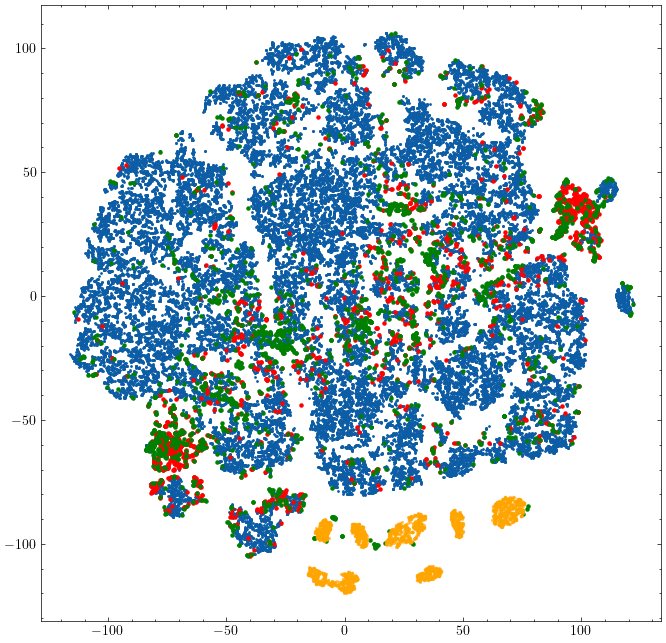

In [21]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(
    output[output["label"] == 0]["tsne_x"],
    output[output["label"] == 0]["tsne_y"],
    s=1,
    marker="o"
)
ax.scatter(
    output[output["label"] == 1]["tsne_x"],
    output[output["label"] == 1]["tsne_y"],
    s=5,
    marker="o",
    c="r"
)
ax.scatter(
    output[output["label"] == 2]["tsne_x"],
    output[output["label"] == 2]["tsne_y"],
    s=5,
    marker="o",
    c="green"
)
ax.scatter(
    output[output["label"] == 3]["tsne_x"],
    output[output["label"] == 3]["tsne_y"],
    s=2,
    marker="o",
    c="orange",
    alpha=.5
)

In [7]:
output[output["label"] == 0]["score"].std()

2.4164869202058736

In [5]:
global_df = output[~((output["label"] == 1) & (output["score"] >= 0)) & ((output["label"] == 1) | (output["label"] == 0))]
contamination_global = len(global_df[global_df["label"] == 1])/len(global_df)
global_df = global_df.to_numpy()

In [6]:
contamination_global

0.00815298248398167

In [7]:
cluster_df = output[~((output["label"] == 3) & (output["score"] >= 0)) & ((output["label"] == 3) | (output["label"] == 0))]
contamination_cluster = len(cluster_df[cluster_df["label"] == 3])/len(cluster_df)
cluster_df = cluster_df.to_numpy()

In [8]:
contamination_cluster

0.01729559748427673

In [9]:
from evaluation import algo_results, algo_rank_results, result_df, plot_results

In [10]:
local_df = output[(output["label"] == 0) | (output["label"] == 2)].to_numpy()
contamination_local = len(output[output["label"] == 2])/len(local_df)

In [12]:
contamination_local

0.013962293918119428

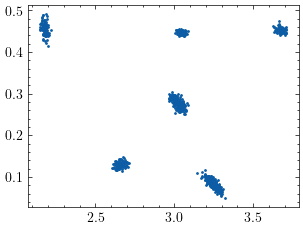

In [9]:
plt.scatter(
    output[output["label"] == 3].to_numpy()[:, 2], output[output["label"] == 3].to_numpy()[:, 3], s=1
)

In [18]:
12000/3100000

0.003870967741935484

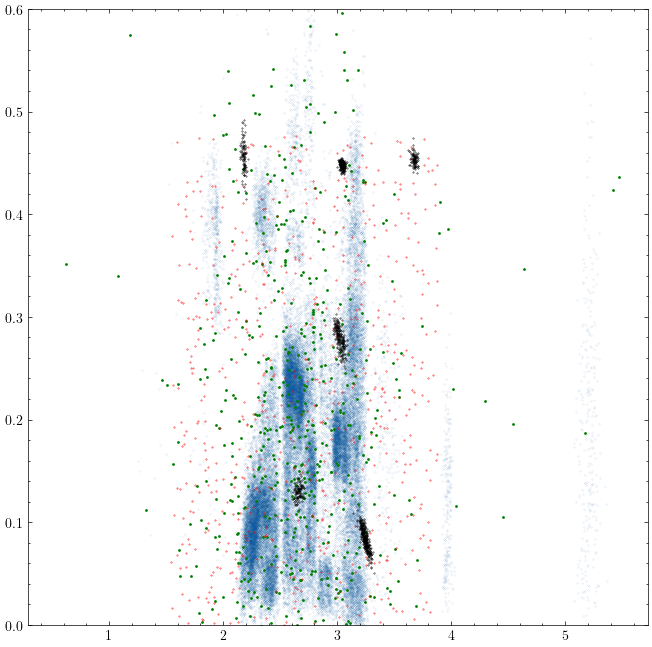

In [19]:
plt.subplots(figsize=(8,8))
plt.ylim(0, .6)
plt.scatter(
    output[output["label"] == 0].to_numpy()[:, 2], output[output["label"] == 0].to_numpy()[:, 3], s=.01, alpha=.5
)
plt.scatter(
    output[output["label"] == 2].to_numpy()[:, 2], output[output["label"] == 2].to_numpy()[:, 3], s=1, c="green"
)
plt.scatter(
    output[output["label"] == 1].to_numpy()[:, 2], output[output["label"] == 1].to_numpy()[:, 3], s=.1, c="red"
)

plt.scatter(
    output[output["label"] == 3].to_numpy()[:, 2], output[output["label"] == 3].to_numpy()[:, 3], s=.1, c="black"
)

'plt.scatter(\n    output[output["label"] == 1].to_numpy()[:, 0], output[output["label"] == 1].to_numpy()[:, 1], s=.1, c="red"\n)\nplt.scatter(\n    output[output["label"] == 3].to_numpy()[:, 0], output[output["label"] == 3].to_numpy()[:, 1], s=.1, c="black"\n)'

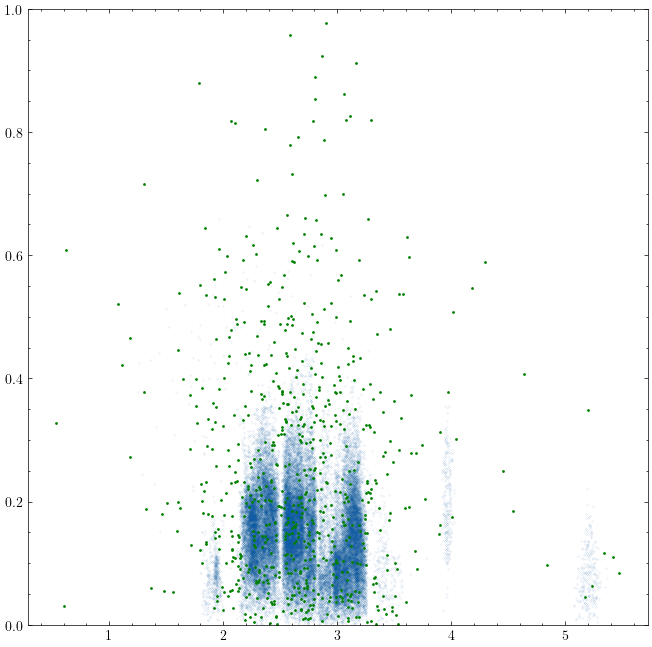

In [22]:
plt.subplots(figsize=(8,8))
plt.ylim(0, 1)
plt.scatter(
    output[output["label"] == 0].to_numpy()[:, 2], output[output["label"] == 0].to_numpy()[:, 4], s=.01, alpha=.5
)
plt.scatter(
    output[output["label"] == 2].to_numpy()[:, 2], output[output["label"] == 2].to_numpy()[:, 4], s=1, c="green"
)
'''plt.scatter(
    output[output["label"] == 1].to_numpy()[:, 0], output[output["label"] == 1].to_numpy()[:, 1], s=.1, c="red"
)
plt.scatter(
    output[output["label"] == 3].to_numpy()[:, 0], output[output["label"] == 3].to_numpy()[:, 1], s=.1, c="black"
)'''

## Local anomalies

In [13]:
local_scores_with_noise = algo_results(
    data = local_df,
    models = init_algos(
        contamination = contamination_local
    ),
    label = 2,
    #noise_level = .5
    with_noise = True
)
local_results = result_df(
    local_scores_with_noise, anom_type = "local"
).groupby(by=["Algorithm", "metric"]).mean()

KNN
Accuracy metric: {'BAL_ACC': [0.7089528826733189, 0.7431406619675647, 0.7093528560084299, 0.7395546437255061, 0.7370616812680324, 0.7171915147177322, 0.7308160450122039, 0.7235038131960794, 0.7436072975251942, 0.7433739797463794], 'F1': [0.4429223744292237, 0.4698544698544698, 0.4553990610328638, 0.4879120879120879, 0.47516198704103674, 0.4410480349344978, 0.4755555555555556, 0.4434968017057569, 0.48394004282655245, 0.47679324894514763]})
------
IForest
Accuracy metric: {'BAL_ACC': [0.6853231714376936, 0.650768749919596, 0.638970559857413, 0.6543547681616547, 0.6385039242997835, 0.633191559159214, 0.650502101029522, 0.6661196271125784, 0.651168723254707, 0.6670460273408674], 'F1': [0.3632567849686848, 0.31767337807606266, 0.2826552462526767, 0.3086680761099366, 0.27442827442827444, 0.2863636363636364, 0.31208791208791214, 0.34361233480176206, 0.3264367816091954, 0.32048681541582147]})
------
LOF
Accuracy metric: {'BAL_ACC': [0.7042336066484457, 0.7454336377574828, 0.713072198695525

/Users/br/Desktop/ad_lsst/ad_lsst/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/br/Desktop/ad_lsst/ad_lsst/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/br/Desktop/ad_lsst/ad_lsst/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/br/Desktop/ad_lsst/ad_lsst/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The 

CBLOF
Accuracy metric: {'BAL_ACC': [0.5843459851214597, 0.5749407641829726, 0.5751740819617873, 0.5793267290952533, 0.5878320100297407, 0.569095101262255, 0.5842793228989412, 0.58344604511746, 0.5594232314336939, 0.5811197382162827], 'F1': [0.18807339449541285, 0.16407982261640802, 0.16666666666666666, 0.17218543046357618, 0.18494623655913978, 0.1596244131455399, 0.18721461187214614, 0.17710583153347728, 0.13363028953229397, 0.17167381974248927]})
------
CD
Accuracy metric: {'BAL_ACC': [0.7976786927655115, 0.6889621101283306, 0.7740843592883282, 0.7525438362588692, 0.7037198982056168, 0.7425730097525662, 0.7622284245377794, 0.6877828027839079, 0.7246497894292427, 0.7595756774109796], 'F1': [0.1282051282051282, 0.28571428571428575, 0.1482213438735178, 0.22398589065255728, 0.32605042016806723, 0.28365384615384615, 0.20442410373760486, 0.37288135593220334, 0.337007874015748, 0.21002386634844866]})
------
COPOD
Accuracy metric: {'BAL_ACC': [0.6682126162349411, 0.6527284145969217, 0.6441898

TypeError: Could not convert locallocallocallocallocallocallocallocallocallocal to numeric

In [16]:
result_df(
    local_scores_with_noise, anom_type = "local"
)

,Algorithm,score,type,metric
0,KNN,0.708953,local,BAL_ACC
1,KNN,0.743141,local,BAL_ACC
2,KNN,0.709353,local,BAL_ACC
3,KNN,0.739555,local,BAL_ACC
4,KNN,0.737062,local,BAL_ACC
...,...,...,...,...
175,HBOS,0.316456,local,F1
176,HBOS,0.304802,local,F1
177,HBOS,0.271889,local,F1
178,HBOS,0.337500,local,F1


In [ ]:
local_scores_with_noise

In [19]:
local_results = result_df(
    local_scores_with_noise, anom_type="local"
).groupby(by=["Algorithm", "metric"])

In [21]:
local_results.describe()

score                                          \
                        count      mean       std       min       25%   
Algorithm       metric                                                  
ABOD            BAL_ACC  10.0  0.723263  0.021321  0.691176  0.705722   
                F1       10.0  0.460262  0.029595  0.407323  0.439337   
CBLOF           BAL_ACC  10.0  0.577898  0.008558  0.559423  0.574999   
                F1       10.0  0.170520  0.016256  0.133630  0.164727   
CD              BAL_ACC  10.0  0.739380  0.037132  0.687783  0.708952   
                F1       10.0  0.252017  0.081898  0.128205  0.205824   
COPOD           BAL_ACC  10.0  0.648375  0.014268  0.614255  0.645128   
                F1       10.0  0.305249  0.020066  0.265356  0.299954   
Feature Bagging BAL_ACC  10.0  0.733134  0.012261  0.708820  0.726327   
                F1       10.0  0.463570  0.021300  0.425963  0.453816   
HBOS            BAL_ACC  10.0  0.651857  0.022936  0.624220  0.635708   
                F1       10.0  0.309989  0.034939  0.266968  0.285995   
IForest         BAL_ACC  10.0  0.653595  0.015728  0.633192  0.641853   
                F1       10.0  0.313567  0.027600  0.274428  0.291940   
KNN             BAL_ACC  10.0  0.729656  0.013956  0.708953  0.718770   
                F1       10.0  0.465208  0.017877  0.441048  0.446472   
LOF             BAL_ACC  10.0  0.719604  0.014542  0.700114  0.709191   
                F1       10.0  0.444501  0.020031  0.417204  0.427097   

                                                       
                              50%       75%       max  
Algorithm       metric                                 
ABOD            BAL_ACC  0.722061  0.738748  0.756265  
                F1       0.461911  0.484414  0.500000  
CBLOF           BAL_ACC  0.580223  0.584071  0.587832  
                F1       0.171930  0.182986  0.188073  
CD              BAL_ACC  0.747558  0.761565  0.797679  
                F1       0.253820  0.315966  0.372881  
COPOD           BAL_ACC  0.651399  0.655400  0.668213  
                F1       0.302247  0.313939  0.344978  
Feature Bagging BAL_ACC  0.734452  0.743374  0.748060  
                F1       0.464048  0.476765  0.492505  
HBOS            BAL_ACC  0.648922  0.668642  0.692069  
                F1       0.302516  0.332239  0.377358  
IForest         BAL_ACC  0.650969  0.663178  0.685323  
                F1       0.314881  0.324949  0.363257  
KNN             BAL_ACC  0.733939  0.742244  0.743607  
                F1       0.472508  0.476484  0.487912  
LOF             BAL_ACC  0.716278  0.730258  0.745434  
                F1       0.444666  0.458537  0.475992

In [11]:
result_df(
    local_scores_with_noise, anom_type = "local"
).groupby(by=["Algorithm", "metric"]).describe()

score                                          \
                        count      mean       std       min       25%   
Algorithm       metric                                                  
ABOD            BAL_ACC  10.0  0.767572  0.014056  0.748007  0.758059   
                F1       10.0  0.538989  0.016791  0.511628  0.533413   
CBLOF           BAL_ACC  10.0  0.603705  0.008707  0.588930  0.599871   
                F1       10.0  0.220091  0.018978  0.199005  0.207241   
CD              BAL_ACC  10.0  0.762667  0.041418  0.657858  0.754045   
                F1       10.0  0.316027  0.078396  0.179927  0.261037   
COPOD           BAL_ACC  10.0  0.686442  0.013465  0.666962  0.678104   
                F1       10.0  0.381398  0.026513  0.346420  0.367593   
Feature Bagging BAL_ACC  10.0  0.751613  0.015899  0.712163  0.747794   
                F1       10.0  0.499865  0.028263  0.439141  0.483862   
HBOS            BAL_ACC  10.0  0.662963  0.022283  0.624575  0.646609   
                F1       10.0  0.336483  0.039049  0.272277  0.308355   
IForest         BAL_ACC  10.0  0.681379  0.023102  0.645868  0.668102   
                F1       10.0  0.369554  0.041164  0.313725  0.341010   
KNN             BAL_ACC  10.0  0.770402  0.012306  0.753135  0.758496   
                F1       10.0  0.543920  0.018270  0.514019  0.537271   
LOF             BAL_ACC  10.0  0.756907  0.018393  0.713096  0.754466   
                F1       10.0  0.511464  0.020004  0.470588  0.505168   

                                                       
                              50%       75%       max  
Algorithm       metric                                 
ABOD            BAL_ACC  0.764423  0.775993  0.794556  
                F1       0.539656  0.548661  0.568233  
CBLOF           BAL_ACC  0.602332  0.609915  0.616833  
                F1       0.214738  0.236052  0.249389  
CD              BAL_ACC  0.770357  0.785872  0.802607  
                F1       0.320312  0.385380  0.407186  
COPOD           BAL_ACC  0.686948  0.691980  0.714343  
                F1       0.378119  0.392729  0.437647  
Feature Bagging BAL_ACC  0.753792  0.761317  0.768401  
                F1       0.505264  0.519722  0.537530  
HBOS            BAL_ACC  0.665521  0.677359  0.699959  
                F1       0.340772  0.361519  0.406542  
IForest         BAL_ACC  0.681420  0.695097  0.723400  
                F1       0.363415  0.394734  0.441913  
KNN             BAL_ACC  0.775103  0.779884  0.785399  
                F1       0.540873  0.551315  0.578431  
LOF             BAL_ACC  0.756914  0.763748  0.786813  
                F1       0.509899  0.519147  0.545024

In [13]:
plot_results(
    scores = local_scores_with_noise,
    anom_type="local",
    title = "Algorithm accuracy evaluation on local anomalies with Gaussian noise"
)

KeyError: 'K'

## Global anomalies

In [25]:
global_scores_with_noise = algo_results(
    data = global_df,
    models = init_algos(
        contamination = contamination_global
    ),
    label = 1,
    noise_level=.25
)

KNN
Accuracy metric: {'BAL_ACC': [0.7763727272727272, 0.8215606060606061, 0.7714939393939394, 0.8483666666666667, 0.8391090909090908, 0.8081242424242424, 0.8033454545454546, 0.8035454545454546, 0.8305848484848486, 0.8395757575757575], 'F1': [0.6161616161616162, 0.6574074074074074, 0.5797101449275363, 0.652542372881356, 0.6276150627615062, 0.6570048309178743, 0.6291079812206574, 0.6473429951690821, 0.6636363636363637, 0.6666666666666666]})
------
IForest
Accuracy metric: {'BAL_ACC': [0.6704939393939394, 0.6793848484848485, 0.6384424242424243, 0.7016121212121212, 0.7072575757575758, 0.6470333333333333, 0.7018121212121212, 0.6391090909090908, 0.6609030303030303, 0.6564909090909091], 'F1': [0.35348837209302325, 0.3587443946188341, 0.2883720930232558, 0.3703703703703704, 0.43601895734597157, 0.28448275862068967, 0.37974683544303794, 0.31794871794871793, 0.31578947368421056, 0.3139013452914798]})
------
LOF
Accuracy metric: {'BAL_ACC': [0.7073242424242424, 0.688609090909091, 0.68890909090909

In [26]:
global_results = result_df(
    global_scores_with_noise, anom_type = "global"
).groupby(by=["Algorithm", "metric"]).describe()
global_results

score                                          \
                        count      mean       std       min       25%   
Algorithm       metric                                                  
ABOD            BAL_ACC  10.0  0.733949  0.026930  0.702712  0.714109   
                F1       10.0  0.469175  0.033864  0.428571  0.448057   
CBLOF           BAL_ACC  10.0  0.500016  0.005307  0.496000  0.496150   
                F1       10.0  0.007430  0.010437  0.000000  0.000000   
CD              BAL_ACC  10.0  0.651191  0.066183  0.548200  0.611739   
                F1       10.0  0.239975  0.061123  0.125714  0.221375   
COPOD           BAL_ACC  10.0  0.641564  0.021587  0.606691  0.624631   
                F1       10.0  0.290752  0.034636  0.233010  0.264436   
Feature Bagging BAL_ACC  10.0  0.683479  0.031652  0.633864  0.675742   
                F1       10.0  0.364607  0.053885  0.279070  0.342454   
HBOS            BAL_ACC  10.0  0.724114  0.019711  0.693255  0.708169   
                F1       10.0  0.437795  0.030176  0.392694  0.421214   
IForest         BAL_ACC  10.0  0.670254  0.026310  0.638442  0.649398   
                F1       10.0  0.341886  0.046810  0.284483  0.314373   
KNN             BAL_ACC  10.0  0.814208  0.026410  0.771494  0.803395   
                F1       10.0  0.639720  0.026972  0.579710  0.627988   
LOF             BAL_ACC  10.0  0.704718  0.015370  0.688476  0.691098   
                F1       10.0  0.416686  0.029737  0.373333  0.393699   

                                                       
                              50%       75%       max  
Algorithm       metric                                 
ABOD            BAL_ACC  0.723100  0.751526  0.775239  
                F1       0.457282  0.498187  0.525862  
CBLOF           BAL_ACC  0.496433  0.504555  0.510103  
                F1       0.000000  0.016249  0.027397  
CD              BAL_ACC  0.657180  0.706064  0.733842  
                F1       0.266897  0.276471  0.300319  
COPOD           BAL_ACC  0.647650  0.660670  0.661403  
                F1       0.295689  0.319292  0.338028  
Feature Bagging BAL_ACC  0.681674  0.694449  0.742888  
                F1       0.363218  0.397660  0.448133  
HBOS            BAL_ACC  0.722667  0.742227  0.747733  
                F1       0.431307  0.464312  0.482143  
IForest         BAL_ACC  0.665698  0.696055  0.707258  
                F1       0.335719  0.367464  0.436019  
KNN             BAL_ACC  0.814842  0.836978  0.848367  
                F1       0.649943  0.657307  0.666667  
LOF             BAL_ACC  0.702562  0.714092  0.733897  
                F1       0.419536  0.440556  0.453704

In [28]:
result_df(
    global_scores_with_noise, anom_type = "global"
).groupby(by=["metric"]).describe()

score                                                           \
        count      mean       std    min       25%       50%       75%   
metric                                                                   
BAL_ACC  90.0  0.680388  0.086141  0.496  0.642888  0.697767  0.724203   
F1       90.0  0.356447  0.169466  0.000  0.281074  0.376481  0.449354   

                   
              max  
metric             
BAL_ACC  0.848367  
F1       0.666667

In [16]:
plot_results(
    scores = global_scores_with_noise,
    anom_type="global",
    title = "Algorithm accuracy evaluation on global anomalies with Gaussian noise"
)

KeyError: 'K'

## Cluster anomalies

In [30]:
cluster_scores_with_noise = algo_results(
    data = cluster_df,
    models = init_algos(
        contamination_cluster
    ),
    label = 3.,
    noise_level=.25
)

KNN
Accuracy metric: {'BAL_ACC': [0.48956666666666665, 0.49006666666666665, 0.4892, 0.49066666666666664, 0.4899, 0.4888, 0.49156666666666665, 0.4897, 0.4898666666666667, 0.48946666666666666], 'F1': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]})
------
IForest
Accuracy metric: {'BAL_ACC': [0.9593, 0.8930666666666667, 0.8570333333333333, 0.9286, 0.8157, 0.9201, 0.8834, 0.9082333333333332, 0.8515666666666666, 0.8811], 'F1': [0.9246231155778895, 0.7966386554621848, 0.7140495867768595, 0.8599999999999999, 0.6183574879227053, 0.8433333333333335, 0.7979274611398963, 0.8213689482470785, 0.6915584415584416, 0.7705192629815746]})
------
LOF
Accuracy metric: {'BAL_ACC': [0.5033333333333333, 0.4979, 0.5019666666666667, 0.4924, 0.4981333333333334, 0.5015666666666667, 0.5002666666666666, 0.4988666666666667, 0.5038333333333334, 0.4943666666666667], 'F1': [0.026315789473684216, 0.016181229773462785, 0.023411371237458192, 0.006349206349206349, 0.01636661211129296, 0.022950819672131147, 0.02006688

In [31]:
cluster_results = result_df(
    cluster_scores_with_noise, anom_type = "cluster"
).groupby(by=["Algorithm", "metric"]).describe()
cluster_results

score                                          \
                        count      mean       std       min       25%   
Algorithm       metric                                                  
ABOD            BAL_ACC  10.0  0.490657  0.001052  0.488867  0.489942   
                F1       10.0  0.001316  0.001701  0.000000  0.000000   
CBLOF           BAL_ACC  10.0  0.855053  0.014691  0.830833  0.852742   
                F1       10.0  0.717724  0.019011  0.686007  0.710926   
CD              BAL_ACC  10.0  0.870673  0.023705  0.822833  0.864200   
                F1       10.0  0.715075  0.032236  0.672316  0.694135   
COPOD           BAL_ACC  10.0  0.678290  0.008319  0.664067  0.672817   
                F1       10.0  0.367994  0.012572  0.350820  0.359921   
Feature Bagging BAL_ACC  10.0  0.518767  0.012398  0.504600  0.508283   
                F1       10.0  0.055948  0.023612  0.028986  0.035851   
HBOS            BAL_ACC  10.0  0.701350  0.023046  0.652800  0.693242   
                F1       10.0  0.411521  0.039301  0.338681  0.396540   
IForest         BAL_ACC  10.0  0.889810  0.041829  0.815700  0.863050   
                F1       10.0  0.783838  0.089367  0.618357  0.728167   
KNN             BAL_ACC  10.0  0.489880  0.000777  0.488800  0.489492   
                F1       10.0  0.000000  0.000000  0.000000  0.000000   
LOF             BAL_ACC  10.0  0.499263  0.003733  0.492400  0.497958   
                F1       10.0  0.018622  0.006951  0.006349  0.016228   

                                                       
                              50%       75%       max  
Algorithm       metric                                 
ABOD            BAL_ACC  0.490533  0.491392  0.492300  
                F1       0.000000  0.003216  0.003436  
CBLOF           BAL_ACC  0.854583  0.866217  0.875700  
                F1       0.715719  0.727362  0.749175  
CD              BAL_ACC  0.866500  0.881992  0.912567  
                F1       0.707067  0.741645  0.769231  
COPOD           BAL_ACC  0.678767  0.681575  0.692933  
                F1       0.367699  0.375777  0.390572  
Feature Bagging BAL_ACC  0.514567  0.528208  0.537100  
                F1       0.048041  0.073290  0.091057  
HBOS            BAL_ACC  0.705067  0.715658  0.731067  
                F1       0.412797  0.442416  0.465574  
IForest         BAL_ACC  0.888233  0.917133  0.959300  
                F1       0.797283  0.837842  0.924623  
KNN             BAL_ACC  0.489783  0.490025  0.491567  
                F1       0.000000  0.000000  0.000000  
LOF             BAL_ACC  0.499567  0.501867  0.503833  
                F1       0.018522  0.023296  0.027950

/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_11264/3153715304.py:142: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = models.keys(), rotation=45)
/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_11264/3153715304.py:142: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = models.keys(), rotation=45)


(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Algorithm accuracy evaluation on cluster anomalies with Gaussian noise'}, xlabel='Algorithm', ylabel='score'>)

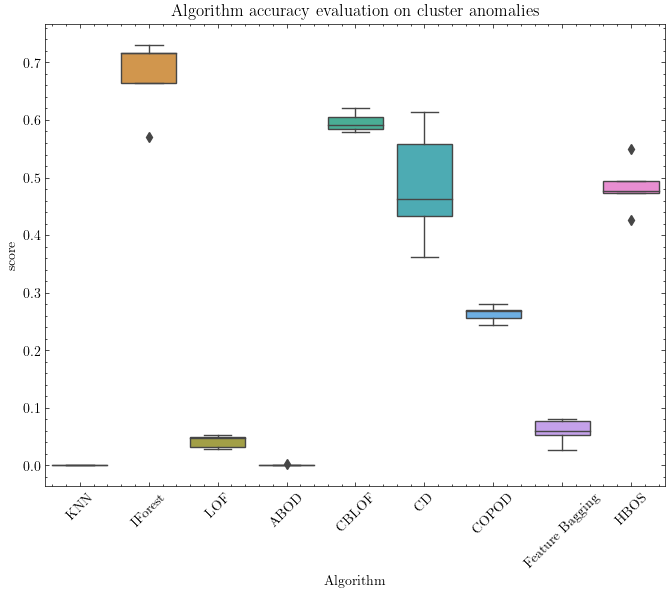

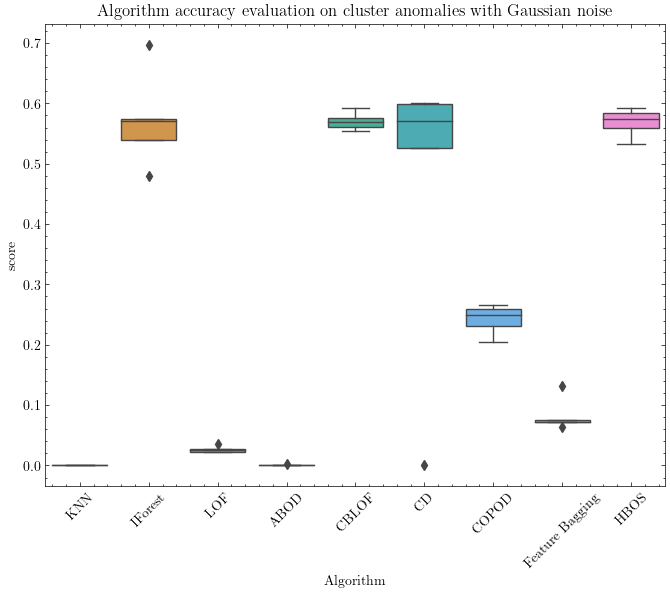

In [ ]:
plot_results(
    scores = cluster_scores_with_noise,
    anom_type="global",
    title = "Algorithm accuracy evaluation on cluster anomalies with Gaussian noise"
)

## SDSS Anoms

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
sdss_df = pd.read_csv("sdss_anoms.csv")
sdss_df["label"] = 4

sdss_df = np.concatenate([output[output["label"] == 0].to_numpy()[:, 0:6], sdss_df[["A_MAG", "i-z", "A_OSC", "SINI_OSC", "E_OSC", "label"]].to_numpy()])

sdss_scores = {key : [] for key in models}

for name, clf in zip(models.keys(), models.values()):
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(
            sdss_df[:, 0:-2], 
            sdss_df[:, 5], 
            test_size=.3,
            #random_state=42,
            stratify=sdss_df[:, 5],
            shuffle=True
        )
        clf.fit(X_train)

        # get the prediction labels and outlier scores of the training data
        y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
        y_train_scores = clf.decision_scores_  # raw outlier scores

        
        # get the prediction on the test data
        y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
        y_test_scores = clf.decision_function(X_test)  # outlier scores
        
        acc = balanced_accuracy_score(y_test/4, y_test_pred)
        sdss_scores[name].append(acc)
        print(f"Accuracy metric: {acc})")

Accuracy metric: 0.9220172486669268)
Accuracy metric: 0.9323739676811029)
Accuracy metric: 0.921883128495253)
Accuracy metric: 0.9233584503836649)
Accuracy metric: 0.9359616822733776)
Accuracy metric: 0.9506437768240343)
Accuracy metric: 0.951716738197425)
Accuracy metric: 0.9506773068669527)
Accuracy metric: 0.9530244098712446)
Accuracy metric: 0.9489002145922747)
Accuracy metric: 0.5994765249057095)
Accuracy metric: 0.6293101346078813)
Accuracy metric: 0.5721576684224217)
Accuracy metric: 0.583050868123293)
Accuracy metric: 0.5384345737417089)
Accuracy metric: 0.8912447977630381)
Accuracy metric: 0.8752550315385617)
Accuracy metric: 0.8612435378462739)
Accuracy metric: 0.8709631860449993)
Accuracy metric: 0.8905406668617506)


## Global ranking

In [28]:
global_rank_scores_with_noise = algo_rank_results(
    data = global_df,
    models = init_algos(
        contamination = contamination_global
    ),
    label = 1,
    #with_noise = False,
    noise_level=.25
)

In [29]:
pd.DataFrame(global_rank_scores_with_noise).describe()

,KNN,IForest,LOF,ABOD,CBLOF,CD,COPOD,Feature Bagging,HBOS
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.769600,0.498600,0.419400,0.723400,0.397400,0.540800,0.478400,0.484400,0.518000
std,0.009606,0.033026,0.020807,0.009336,0.033374,0.014913,0.018228,0.028202,0.022071
min,0.750000,0.442000,0.396000,0.708000,0.368000,0.516000,0.454000,0.434000,0.490000
25%,0.764500,0.477500,0.405500,0.718500,0.376500,0.530500,0.466500,0.466000,0.502500
50%,0.770000,0.502000,0.418000,0.723000,0.381000,0.542000,0.471000,0.488000,0.517000
75%,0.775000,0.513500,0.424500,0.730000,0.415000,0.547000,0.491000,0.500000,0.530000
max,0.784000,0.552000,0.470000,0.738000,0.462000,0.570000,0.512000,0.524000,0.562000


In [ ]:
plot_results(
    global_rank_scores,
    anom_type="global",
    title="Ranking correlation for algorithms on the global dataset"
)
plot_results(
    global_rank_scores_with_noise,
    anom_type="global",
    title="Ranking correlation for algorithms on the global dataset with noise"
)

NameError: name 'global_rank_scores' is not defined

In [6]:
from sklearn.metrics import log_loss
import numpy as np

log_loss(
    y_true = np.array([.1,.1,.2]),
    y_pred=np.array([.1,.1,.3])
)

ValueError: Unknown label type: (array([0.1, 0.1, 0.2]),)

## Cluster ranking evaluation

In [32]:
'''cluster_rank_scores = algo_rank_results(
    data = cluster_df,
    label = 1,
    with_noise = False,
    #noise_level=1
)'''
cluster_rank_scores_with_noise = algo_rank_results(
    data = cluster_df,
    models = init_algos(
        contamination = contamination_global
    ),
    label = 3,
    #with_noise = False,
    noise_level= .25
)

'''plot_results(
    cluster_rank_scores,
    anom_type="cluster",
    title="Ranking correlation for algorithms on the cluster dataset"
)
plot_results(
    cluster_rank_scores_with_noise,
    anom_type="cluster",
    title="Ranking correlation for algorithms on the cluster dataset with noise"
)'''

'plot_results(\n    cluster_rank_scores,\n    anom_type="cluster",\n    title="Ranking correlation for algorithms on the cluster dataset"\n)\nplot_results(\n    cluster_rank_scores_with_noise,\n    anom_type="cluster",\n    title="Ranking correlation for algorithms on the cluster dataset with noise"\n)'

In [33]:
pd.DataFrame(cluster_rank_scores_with_noise).describe()

,KNN,IForest,LOF,ABOD,CBLOF,CD,COPOD,Feature Bagging,HBOS
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.363200,0.684000,0.215600,0.341000,0.659000,0.683600,0.483000,0.297800,0.487200
std,0.012044,0.014391,0.013125,0.005676,0.011747,0.017608,0.016145,0.020275,0.026148
min,0.346000,0.656000,0.190000,0.334000,0.630000,0.662000,0.458000,0.272000,0.452000
25%,0.354500,0.676500,0.208500,0.336500,0.658500,0.674000,0.472500,0.286500,0.468500
50%,0.364000,0.684000,0.222000,0.341000,0.660000,0.679000,0.488000,0.291000,0.485000
75%,0.372500,0.694500,0.224000,0.345000,0.663000,0.692000,0.494500,0.305000,0.509500
max,0.380000,0.704000,0.232000,0.350000,0.674000,0.718000,0.502000,0.338000,0.524000


## Local ranking evaluation

In [22]:
import joblib 

anom_gen = joblib.load(open("../synthetic_anomalies/gmm/gmm.joblib", "rb"))
params = anom_gen._get_parameters()

In [23]:
arr = np.vectorize(lambda x: params[1][int(x)][0])(local_df[:, 7]).reshape(-1, 1)
for i in range(1, 5):
    arr = np.hstack((arr, np.vectorize(lambda x: params[1][int(x)][int(i)])(local_df[:, 7]).reshape(-1, 1)))

centroid_dist = np.linalg.norm(scaler.inverse_transform(arr) - local_df[:, 0:5], axis=1)

scaled_centroid_dist = (centroid_dist - centroid_dist.min())
scaled_centroid_dist /= scaled_centroid_dist.max()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
def algo_rank_local_results(data, label, iterations = 10, with_noise=True, noise_level = 0, silent = False):
    rank_scores = {key : [] for key in models}
    '''if anom_type == "local":
        idx = -1
    else:'''
    idx = -1

    for i in range(iterations):
        if with_noise:
            duplicate_idx = np.random.choice(500, size=100, replace=False)

            noisy_features = data[:, :5] + noise_level*data[:, -6:-1]
            noisy_features =  np.concatenate([noisy_features, noisy_features[duplicate_idx, 0:5]]) # Add duplicates

            noisy_scores = np.concatenate([data[:, idx], data[duplicate_idx, idx]])
            noisy_labels = np.concatenate([data[:, 5], data[duplicate_idx, 5]])

            # Should I make use of training score?
            X_train, X_test, y_train, y_test = train_test_split(
                noisy_features, 
                noisy_scores, 
                test_size=.3,
                #random_state=42,
                stratify=noisy_labels,
                shuffle=True
            )
                    
        else:
            X_train, X_test, y_train, y_test = train_test_split(
                data[:, 0:5], 
                data[:, idx], # score column of dataset
                test_size=.3,
                #random_state=42,
                stratify=data[:, 5],
                shuffle=True
            )

        rn_model_idx = np.argsort(y_test)[-500::]

        for name, clf in zip(models.keys(), models.values()):
            
            clf.fit(X_train)
            # get the prediction labels and outlier scores of the training data
            #y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
            #y_train_scores = clf.decision_scores_  # raw outlier scores
            

            # get the prediction on the test data
            #y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
            y_test_scores = clf.decision_function(X_test)  # outlier scoress
            
            '''rn_algo_scores = y_test_scores - y_test_scores.min()
            rn_algo_scores /= rn_algo_scores.max()
            
            rn_model_scores = abs(y_test - y_test.max())
            rn_model_scores /= rn_model_scores.max()
            '''
            #acc = balanced_accuracy_score(y_test, label*y_test_pred)
            #model_scores = anom_gen.gmm.score_samples(X_test)
            ''' print(np.argsort(y_test_scores)[::-1])
                print(np.argsort(y_test))'''
            #print(y_test_scores, model_scores.min())


            err_score = len(np.intersect1d(rn_model_idx, np.argsort(y_test_scores)[-500::])) / 500 # Overlap of the top 100 outliers.
            rank_scores[name].append(err_score)
            
            #rank_scores[name].append(kendalltau(rn_model_scores, rn_algo_scores).correlation)
            #print(f"Name: {name}, spearman: {spearmanr(rn_model_scores, rn_algo_scores)}")
            '''if not silent:
                print(name)
                print(f"Accuracy metric: {rank_scores[name]})")
                print(("------"))'''

    return rank_scores

In [26]:
local_rank_scores_with_noise = algo_rank_local_results(
    data = np.hstack((local_df, scaled_centroid_dist.reshape(-1,1))),
    label = 2,
    #with_noise = False,
    noise_level=.25
)

/Users/br/Desktop/ad_lsst/ad_lsst/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/br/Desktop/ad_lsst/ad_lsst/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/br/Desktop/ad_lsst/ad_lsst/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/br/Desktop/ad_lsst/ad_lsst/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The 

In [28]:
pd.DataFrame(local_rank_scores_with_noise).describe()

,KNN,IForest,LOF,ABOD,CBLOF,CD,COPOD,Feature Bagging,HBOS
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.306000,0.477000,0.203200,0.288000,0.625200,0.459600,0.378800,0.243800,0.277600
std,0.014787,0.025038,0.012007,0.013166,0.035965,0.057083,0.012044,0.033433,0.025365
min,0.278000,0.426000,0.174000,0.272000,0.576000,0.378000,0.362000,0.206000,0.230000
25%,0.301500,0.467000,0.202000,0.277500,0.602500,0.412500,0.372500,0.218000,0.261000
50%,0.310000,0.476000,0.204000,0.288000,0.621000,0.458000,0.376000,0.237000,0.285000
75%,0.315500,0.492000,0.210000,0.294000,0.661000,0.503500,0.387500,0.255500,0.289000
max,0.324000,0.514000,0.218000,0.316000,0.666000,0.540000,0.400000,0.318000,0.318000


/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_97597/2420018546.py:133: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = models.keys(), rotation=45)
/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_97597/2420018546.py:133: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = models.keys(), rotation=45)


(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Ranking correlation for algorithms on the cluster dataset with noise'}, xlabel='Algorithm', ylabel='score'>)

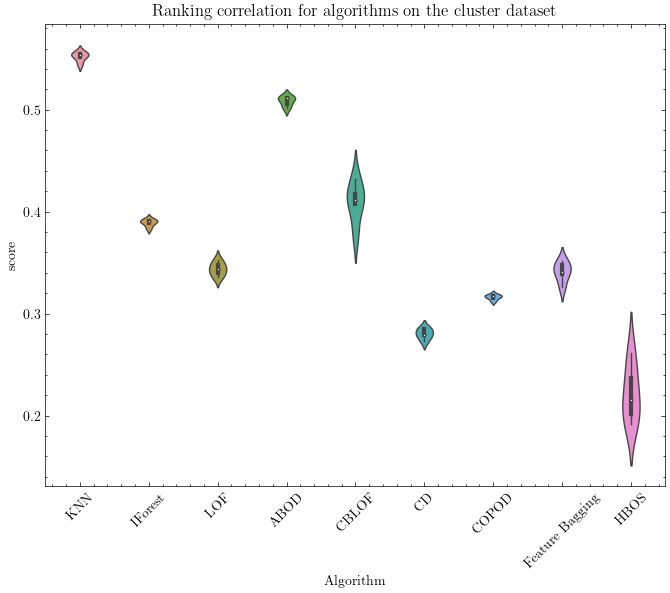

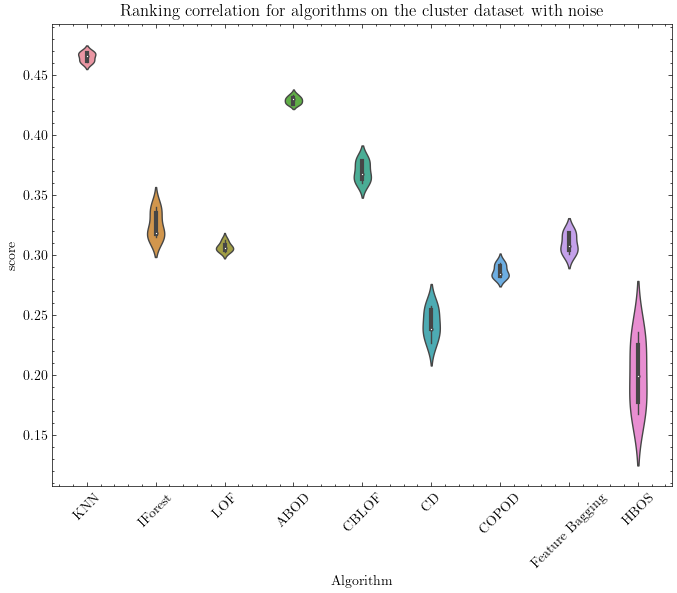

In [ ]:
plot_results(
    local_rank_scores_with_noise,
    anom_type="cluster",
    title="Ranking correlation for algorithms on the cluster dataset with noise"
)